In [31]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
stock = 'SONY'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,29.520000,30.180000,29.50,30.020000,30.020000,988800
2010-01-05,29.719999,29.930000,29.50,29.879999,29.879999,567800
2010-01-06,29.879999,29.950001,29.66,29.850000,29.850000,468200
2010-01-07,29.740000,29.870001,29.59,29.799999,29.799999,645300
2010-01-08,30.040001,30.469999,29.93,30.410000,30.410000,574100


In [33]:
price = data['Close']
price

Date
2010-01-04    30.020000
2010-01-05    29.879999
2010-01-06    29.850000
2010-01-07    29.799999
2010-01-08    30.410000
                ...    
2023-05-12    94.680000
2023-05-15    94.669998
2023-05-16    93.809998
2023-05-17    95.320000
2023-05-18    98.889999
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

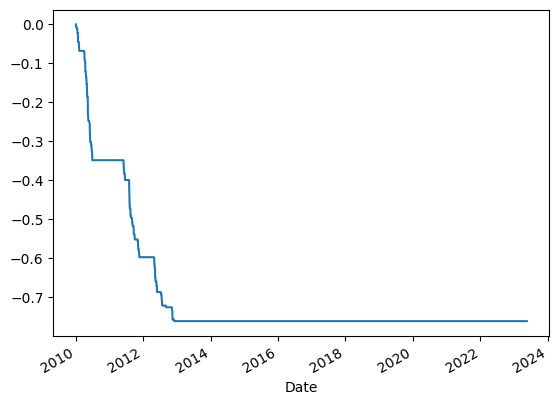

In [34]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [35]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -76.18694252852745 %


In [36]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.0046636 , -0.00100398, ..., -0.00908419,
        0.01609639,  0.03745279])

In [37]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.9953364 , 0.99433711, ..., 3.12491659, 3.17521646,
       3.29413717])

In [38]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 329.41371712762077%


In [39]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.494819
2012-12-31   -0.379157
2013-12-31    0.543750
2014-12-31    0.183921
2015-12-31    0.202247
2016-12-31    0.138968
2017-12-31    0.603639
2018-12-31    0.074082
2019-12-31    0.408451
2020-12-31    0.486765
2021-12-31    0.250247
2022-12-31   -0.396519
2023-12-31    0.296408
Freq: A-DEC, Name: Close, dtype: float64

In [40]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.026482
2010-03-31    0.123424
2010-04-30   -0.106994
2010-05-31   -0.100526
                ...   
2023-01-31    0.172784
2023-02-28   -0.065728
2023-03-31    0.084590
2023-04-30   -0.010811
2023-05-31    0.102821
Freq: M, Name: Close, Length: 161, dtype: float64

In [41]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 14.753712526732931%


In [42]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 9.895251610493816


In [43]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-04-30   -0.106994
2010-05-31   -0.100526
2010-06-30   -0.133203
2010-08-31   -0.103459
2011-01-31   -0.038365
                ...   
2022-08-31   -0.070734
2022-09-30   -0.192817
2022-12-31   -0.081738
2023-02-28   -0.065728
2023-04-30   -0.010811
Name: Close, Length: 73, dtype: float64

In [44]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 19.430058400294005
